In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
C = 0.1 * 10 ** -6
L = 100 * 10 ** -3
R = 75

### Задание 1

In [4]:
df = pd.read_csv("lab3.11_task1.csv")

In [5]:
f_theor = math.sqrt(1/(L * C) - R ** 2 / (4 * L ** 2)) / 2 / math.pi

In [6]:
math.sqrt(1/(L * C) - R ** 2 / (4 * L ** 2))

9992.96627633657

In [7]:
ma = int(df[df["out_Ampl"] == df["out_Ampl"].max()]["freq"].iloc[0])
Q_line = df["out_Ampl"].max() * (1 / np.sqrt(2))
Q_line

605.2834046956847

In [8]:
ma = int(df[df["out_Ampl"] == df["out_Ampl"].max()]["freq"].iloc[0])
Q = math.sqrt(1/(L * C) - R ** 2 / (4 * L ** 2)) / 2 / math.pi
ma, Q

(1225, 1590.429979029576)

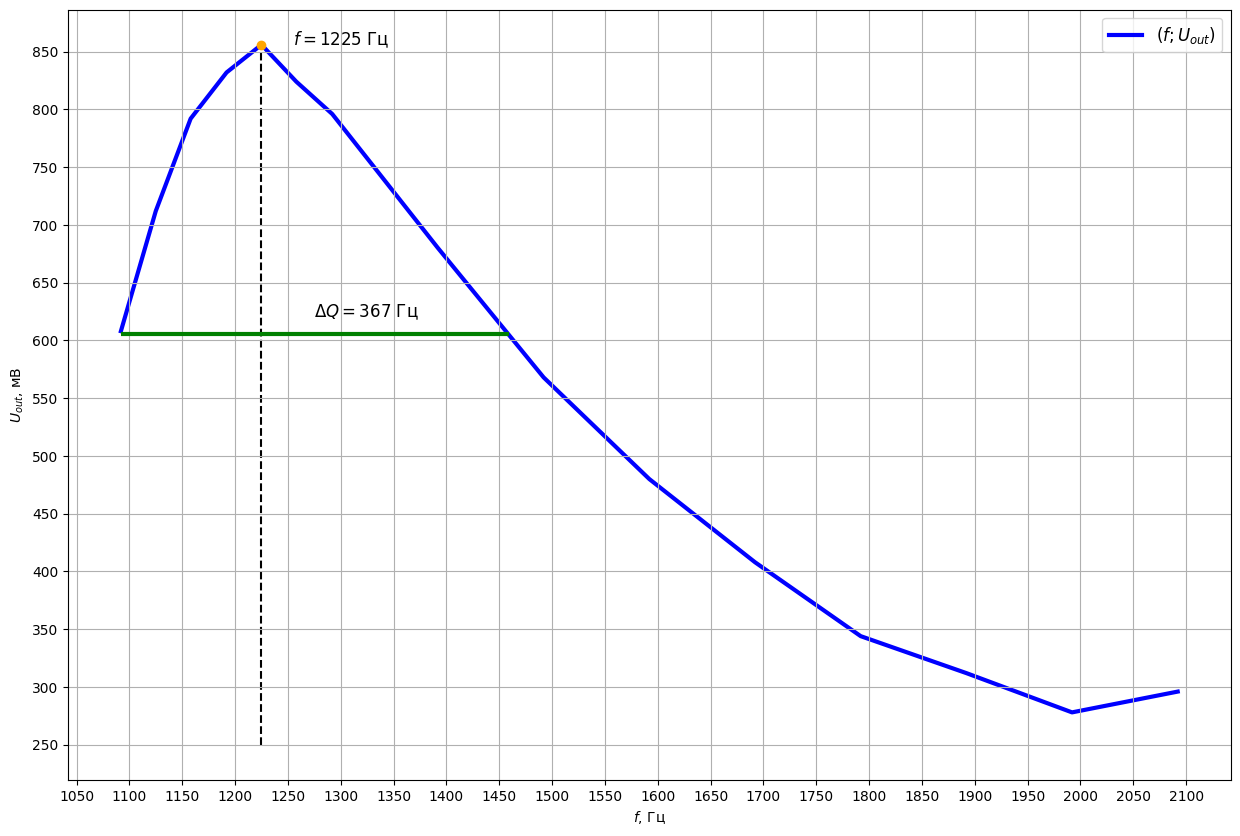

In [9]:
# задание 1

figure, axes = plt.subplots(figsize=(15, 10))
axes.set_xticks(np.arange(0, df["freq"].max() + 50, 50))
axes.set_yticks(np.arange(0, df["out_Ampl"].max() + 50, 50))
axes.set_axisbelow(True)
axes.set_ylabel(r"$U_{out}$, " + "мВ")
axes.set_xlabel(r"$f$, " + "Гц")

axes.plot(df["freq"], df["out_Ampl"], label=r"$(f; U_{out})$", color="blue", zorder=0, linewidth=3)

axes.vlines(ma, 250, df["out_Ampl"].max(), color="black", linestyles="--", zorder=0)

axes.scatter(ma, df["out_Ampl"].max(), color="orange")

axes.text(ma + 30, df["out_Ampl"].max(), rf"$f={ma}$ " + "Гц", fontsize="large")

x1, x2 = 1092, 1459
axes.hlines(Q_line, x1, x2, color="green", linewidth=3)

axes.text((x1 + x2) // 2, Q_line + 15, rf"$\Delta Q = {x2 - x1}$ " + "Гц", fontsize="large")

axes.grid(zorder=1)
axes.legend(fontsize="large")

In [10]:
dL = L * 0.1
dC = C * 0.1
dR = R * 0.1

dOmegadL = -(2 * L + C * R ** 2) / (2 * C * L * math.sqrt((4 * L + C * R ** 2) / C))
dOmegadC = -1 / (C ** 2 * math.sqrt((R ** 2 * C + 4 * L) / C))
dOmegadR = R / (2 * L * math.sqrt((C * R ** 2 + 4 * L) / C))

dOmega = math.sqrt((dOmegadL * dL) ** 2 + (dOmegadC * dC) ** 2 + (dOmegadR * dR) ** 2) / 2 / math.pi
dOmega


79.92073787458683

### Задание 2

In [11]:
dQdL = 1 / (2 * C * R * math.sqrt(L / C))
dQdC = - L / (2 * R * math.sqrt(L / C) * C ** 2)
dQdR = - math.sqrt(L / C) / R ** 2
dQ = math.sqrt((dQdL * dL) ** 2 + (dQdC * dC) ** 2 + (dQdR * dR) ** 2)

Q = 1 / R * math.sqrt(L / C)

In [12]:
Q, dQ

(13.333333333333336, 1.632993161855452)

### Задание 3

In [13]:
import scipy 

df = pd.read_csv("lab3.11_task2.csv")
k = scipy.stats.linregress(1 / (df["capacity"] * 10 ** (-9)), (2 * np.pi * df["exper_f"]) ** 2).slope
b = scipy.stats.linregress(1 / (df["capacity"] [-4:]* 10 ** (-9)), (2 * np.pi * df["exper_f"][-4:]) ** 2).intercept

L_calc = 1 / k
R_calc = np.sqrt(4 * L_calc ** 2 * abs(b))

In [18]:
scipy.stats.linregress(1 / (df["capacity"] * 10 ** (-9)), (2 * np.pi * df["exper_f"]) ** 2)

LinregressResult(slope=6.160467510832104, intercept=31502315.260883808, rvalue=0.99953281729637, pvalue=3.27338534283188e-07, stderr=0.09418771568087332, intercept_stderr=40736111.415565446)

In [17]:
scipy.stats.linregress(1 / (df["capacity"] [-4:]* 10 ** (-9)), (2 * np.pi * df["exper_f"][-4:]) ** 2)

LinregressResult(slope=6.470588967793084, intercept=-4819734.584345132, rvalue=0.9999831275117165, pvalue=1.6872488283525843e-05, stderr=0.026579014638072464, intercept_stderr=1407823.8322182246)

In [19]:
np.sqrt(4 * 0.16 ** 2 * 1407823)

379.6854951140483

In [15]:
L_calc, R_calc

(0.1623253427181744, 712.7346710484634)

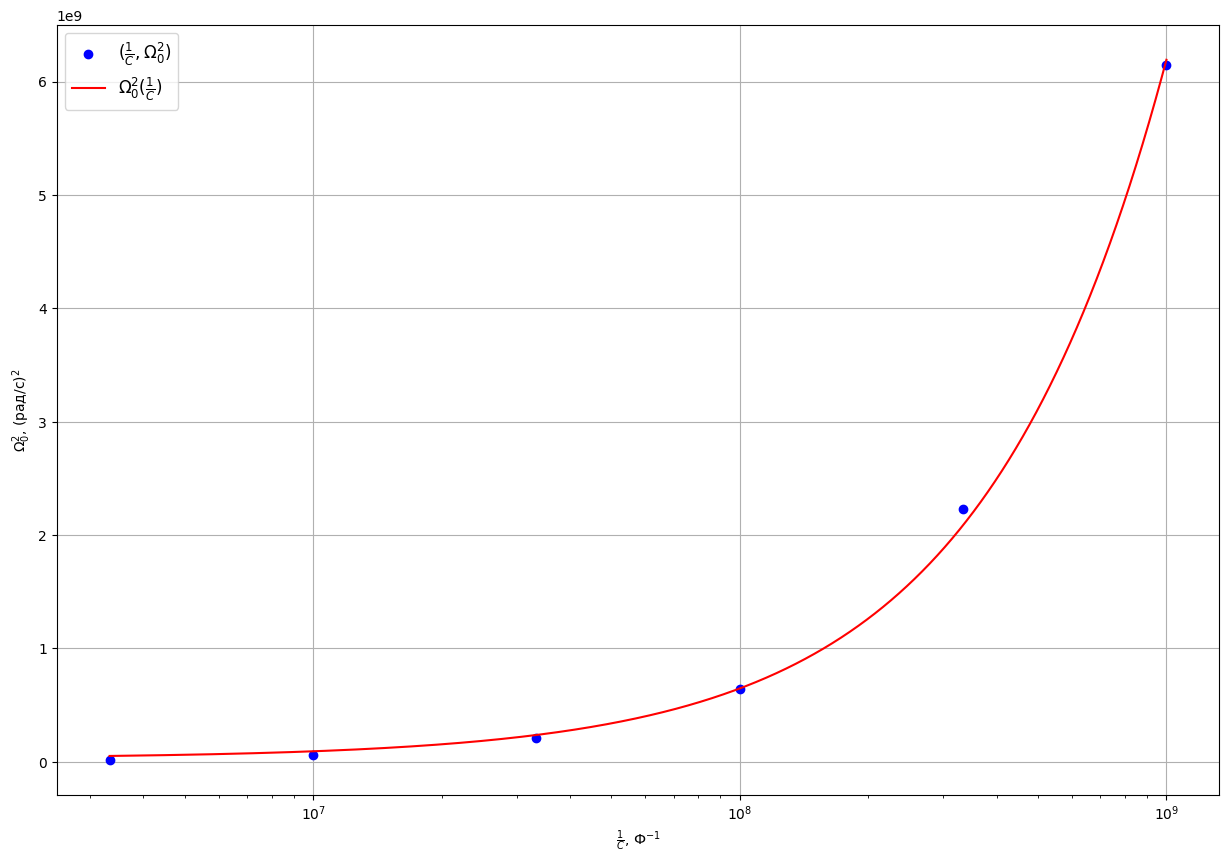

In [16]:
figure, axes = plt.subplots(figsize=(15, 10))
# axes.set_yscale('log')
axes.set_xscale('log')
axes.set_axisbelow(True)
axes.set_xlabel(r"$\frac{1}{C}$, " + "Ф" + r"$^{-1}$")
axes.set_ylabel(r"$\Omega_0^2$, " + "(рад/с)" + r"$^{2}$")

capacity = 1 / (df["capacity"] * 10 ** (-9))
res = scipy.stats.linregress(1 / (df["capacity"] * 10 ** (-9)), (2 * np.pi * df["exper_f"]) ** 2)
slope, intercept = res.slope, res.intercept
X = np.arange(capacity.min(), capacity.max(), 100)

#axes.set_xticks(np.arange(capacity.min(), capacity.max() + 10000, 10000))
#axes.set_yticks(np.arange(0, df["out_Ampl"].max() + 50, 50))

axes.scatter(1 / (df["capacity"] * 10 ** (-9)), (2 * np.pi * df["exper_f"]) ** 2, color="blue", label=r"$(\frac{1}{C}, \Omega_0^2)$")
axes.plot(X, X * slope + intercept, color="red", label=r"$\Omega_0^2(\frac{1}{C})$")


axes.grid(zorder=1)
axes.legend(fontsize="large")